# 噪声变化的准确率


随着噪声参数的变化，逻辑错误率的变化如下：

In [1]:
import pandas as pd

# 文件路径
file_path = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/noisy_varying_qldpc_code_acc_results_r_1.csv"

# 读取CSV文件
df = pd.read_csv(file_path)

# 查看前几行数据
print(df.head())

# 查看数据基本信息
print(df.info())

# 查看数据统计信息
print(df.describe())

                                 code_task          nkd  round  probability  \
0  bivariate_bicycle_code:rotated_memory_x  [72, 12, 6]      1         0.01   
1  bivariate_bicycle_code:rotated_memory_x  [72, 12, 6]      1         0.01   
2  bivariate_bicycle_code:rotated_memory_x  [72, 12, 6]      1         0.10   
3  bivariate_bicycle_code:rotated_memory_x  [72, 12, 6]      1         0.10   
4  bivariate_bicycle_code:rotated_memory_x  [72, 12, 6]      1         0.50   

  noise_model      decoder_method  logical_error_rate  have_stabilizer  
0      si1000              BP+OSD             0.00082            False  
1      si1000  qldpc-new-priority             0.00040            False  
2      si1000              BP+OSD             0.00653            False  
3      si1000  qldpc-new-priority             0.00352            False  
4      si1000              BP+OSD             0.02835            False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (t

In [2]:
# 过滤probability为10的数据
df_filtered = df[df['probability'] == 10]

# 分别获取MWPM和EAMLD的数据
bposd_data = df_filtered[df_filtered['decoder_method'] == 'BP+OSD']
eamld_data = df_filtered[df_filtered['decoder_method'] == 'qldpc-new-priority']

# 合并数据以便比较
merged_df = pd.merge(bposd_data, eamld_data, on=['code_task', 'nkd', 'round', 'probability', 'noise_model', 'have_stabilizer'], suffixes=('_bposd', '_eamld'))

# 计算降低率
merged_df['error_rate_reduction'] = (merged_df['logical_error_rate_bposd'] - merged_df['logical_error_rate_eamld']) / merged_df['logical_error_rate_bposd']

# 显示结果
merged_df[['code_task', 'nkd', 'round', 'probability', 'noise_model', 'logical_error_rate_bposd', 'logical_error_rate_eamld', 'error_rate_reduction']]

,code_task,nkd,round,probability,noise_model,logical_error_rate_bposd,logical_error_rate_eamld,error_rate_reduction
0,bivariate_bicycle_code:rotated_memory_x,"[72, 12, 6]",1,10.0,si1000,0.48711,0.30310,0.377759
1,bivariate_bicycle_code:rotated_memory_x,"[90, 8, 10]",1,10.0,si1000,0.52084,0.32497,0.376066
2,bivariate_bicycle_code:rotated_memory_x,"[108, 8, 10]",1,10.0,si1000,0.55551,0.35088,0.368364
3,bivariate_bicycle_code:rotated_memory_x,"[144, 12, 12]",1,10.0,si1000,0.71045,0.48218,0.321303
4,bivariate_bicycle_code:rotated_memory_z,"[72, 12, 6]",1,10.0,si1000,0.49373,0.33049,0.330626
5,bivariate_bicycle_code:rotated_memory_z,"[90, 8, 10]",1,10.0,si1000,0.53556,0.35672,0.333931
6,bivariate_bicycle_code:rotated_memory_z,"[108, 8, 10]",1,10.0,si1000,0.59605,0.40754,0.316265
7,bivariate_bicycle_code:rotated_memory_z,"[144, 12, 12]",1,10.0,si1000,0.72892,0.52652,0.277671


In [3]:
# 计算平均降低率
average_error_rate_reduction = merged_df['error_rate_reduction'].mean()

# 显示结果
print(f"平均错误率降低: {average_error_rate_reduction:.4f}")
merged_df[['code_task', 'nkd', 'round', 'probability', 'noise_model', 'logical_error_rate_bposd', 'logical_error_rate_eamld', 'error_rate_reduction']]

平均错误率降低: 0.3377


,code_task,nkd,round,probability,noise_model,logical_error_rate_bposd,logical_error_rate_eamld,error_rate_reduction
0,bivariate_bicycle_code:rotated_memory_x,"[72, 12, 6]",1,10.0,si1000,0.48711,0.30310,0.377759
1,bivariate_bicycle_code:rotated_memory_x,"[90, 8, 10]",1,10.0,si1000,0.52084,0.32497,0.376066
2,bivariate_bicycle_code:rotated_memory_x,"[108, 8, 10]",1,10.0,si1000,0.55551,0.35088,0.368364
3,bivariate_bicycle_code:rotated_memory_x,"[144, 12, 12]",1,10.0,si1000,0.71045,0.48218,0.321303
4,bivariate_bicycle_code:rotated_memory_z,"[72, 12, 6]",1,10.0,si1000,0.49373,0.33049,0.330626
5,bivariate_bicycle_code:rotated_memory_z,"[90, 8, 10]",1,10.0,si1000,0.53556,0.35672,0.333931
6,bivariate_bicycle_code:rotated_memory_z,"[108, 8, 10]",1,10.0,si1000,0.59605,0.40754,0.316265
7,bivariate_bicycle_code:rotated_memory_z,"[144, 12, 12]",1,10.0,si1000,0.72892,0.52652,0.277671


## 画图

In [4]:
df['decoder_method'] = df['decoder_method'].replace('qldpc-new-priority', 'EAMLD')

In [5]:
df

,code_task,nkd,round,probability,noise_model,decoder_method,logical_error_rate,have_stabilizer
0,bivariate_bicycle_code:rotated_memory_x,"[72, 12, 6]",1,0.01,si1000,BP+OSD,0.00082,False
1,bivariate_bicycle_code:rotated_memory_x,"[72, 12, 6]",1,0.01,si1000,EAMLD,0.00040,False
2,bivariate_bicycle_code:rotated_memory_x,"[72, 12, 6]",1,0.10,si1000,BP+OSD,0.00653,False
3,bivariate_bicycle_code:rotated_memory_x,"[72, 12, 6]",1,0.10,si1000,EAMLD,0.00352,False
4,bivariate_bicycle_code:rotated_memory_x,"[72, 12, 6]",1,0.50,si1000,BP+OSD,0.02835,False
...,...,...,...,...,...,...,...,...
123,bivariate_bicycle_code:rotated_memory_z,"[144, 12, 12]",1,10.00,si1000,EAMLD,0.52652,False
124,bivariate_bicycle_code:rotated_memory_z,"[144, 12, 12]",1,20.00,si1000,BP+OSD,0.92470,False
125,bivariate_bicycle_code:rotated_memory_z,"[144, 12, 12]",1,20.00,si1000,EAMLD,0.78771,False
126,bivariate_bicycle_code:rotated_memory_z,"[144, 12, 12]",1,30.00,si1000,BP+OSD,0.98024,False


In [6]:
# 对相同 d、round、probability、decoder_method 的 logical_error_rate 取均值
df_mean = df[df['code_task'].isin(['bivariate_bicycle_code:rotated_memory_x', 'bivariate_bicycle_code:rotated_memory_z'])] \
    .groupby(['nkd', 'round', 'probability', 'decoder_method'], as_index=False) \
    .agg({'logical_error_rate': 'mean'})

df_mean

,nkd,round,probability,decoder_method,logical_error_rate
0,"[108, 8, 10]",1,0.01,BP+OSD,0.000935
1,"[108, 8, 10]",1,0.01,EAMLD,0.000480
2,"[108, 8, 10]",1,0.10,BP+OSD,0.009060
3,"[108, 8, 10]",1,0.10,EAMLD,0.004815
4,"[108, 8, 10]",1,0.50,BP+OSD,0.037225
...,...,...,...,...,...
59,"[90, 8, 10]",1,10.00,EAMLD,0.340845
60,"[90, 8, 10]",1,20.00,BP+OSD,0.775870
61,"[90, 8, 10]",1,20.00,EAMLD,0.573270
62,"[90, 8, 10]",1,30.00,BP+OSD,0.892880


In [7]:
df_mean

,nkd,round,probability,decoder_method,logical_error_rate
0,"[108, 8, 10]",1,0.01,BP+OSD,0.000935
1,"[108, 8, 10]",1,0.01,EAMLD,0.000480
2,"[108, 8, 10]",1,0.10,BP+OSD,0.009060
3,"[108, 8, 10]",1,0.10,EAMLD,0.004815
4,"[108, 8, 10]",1,0.50,BP+OSD,0.037225
...,...,...,...,...,...
59,"[90, 8, 10]",1,10.00,EAMLD,0.340845
60,"[90, 8, 10]",1,20.00,BP+OSD,0.775870
61,"[90, 8, 10]",1,20.00,EAMLD,0.573270
62,"[90, 8, 10]",1,30.00,BP+OSD,0.892880


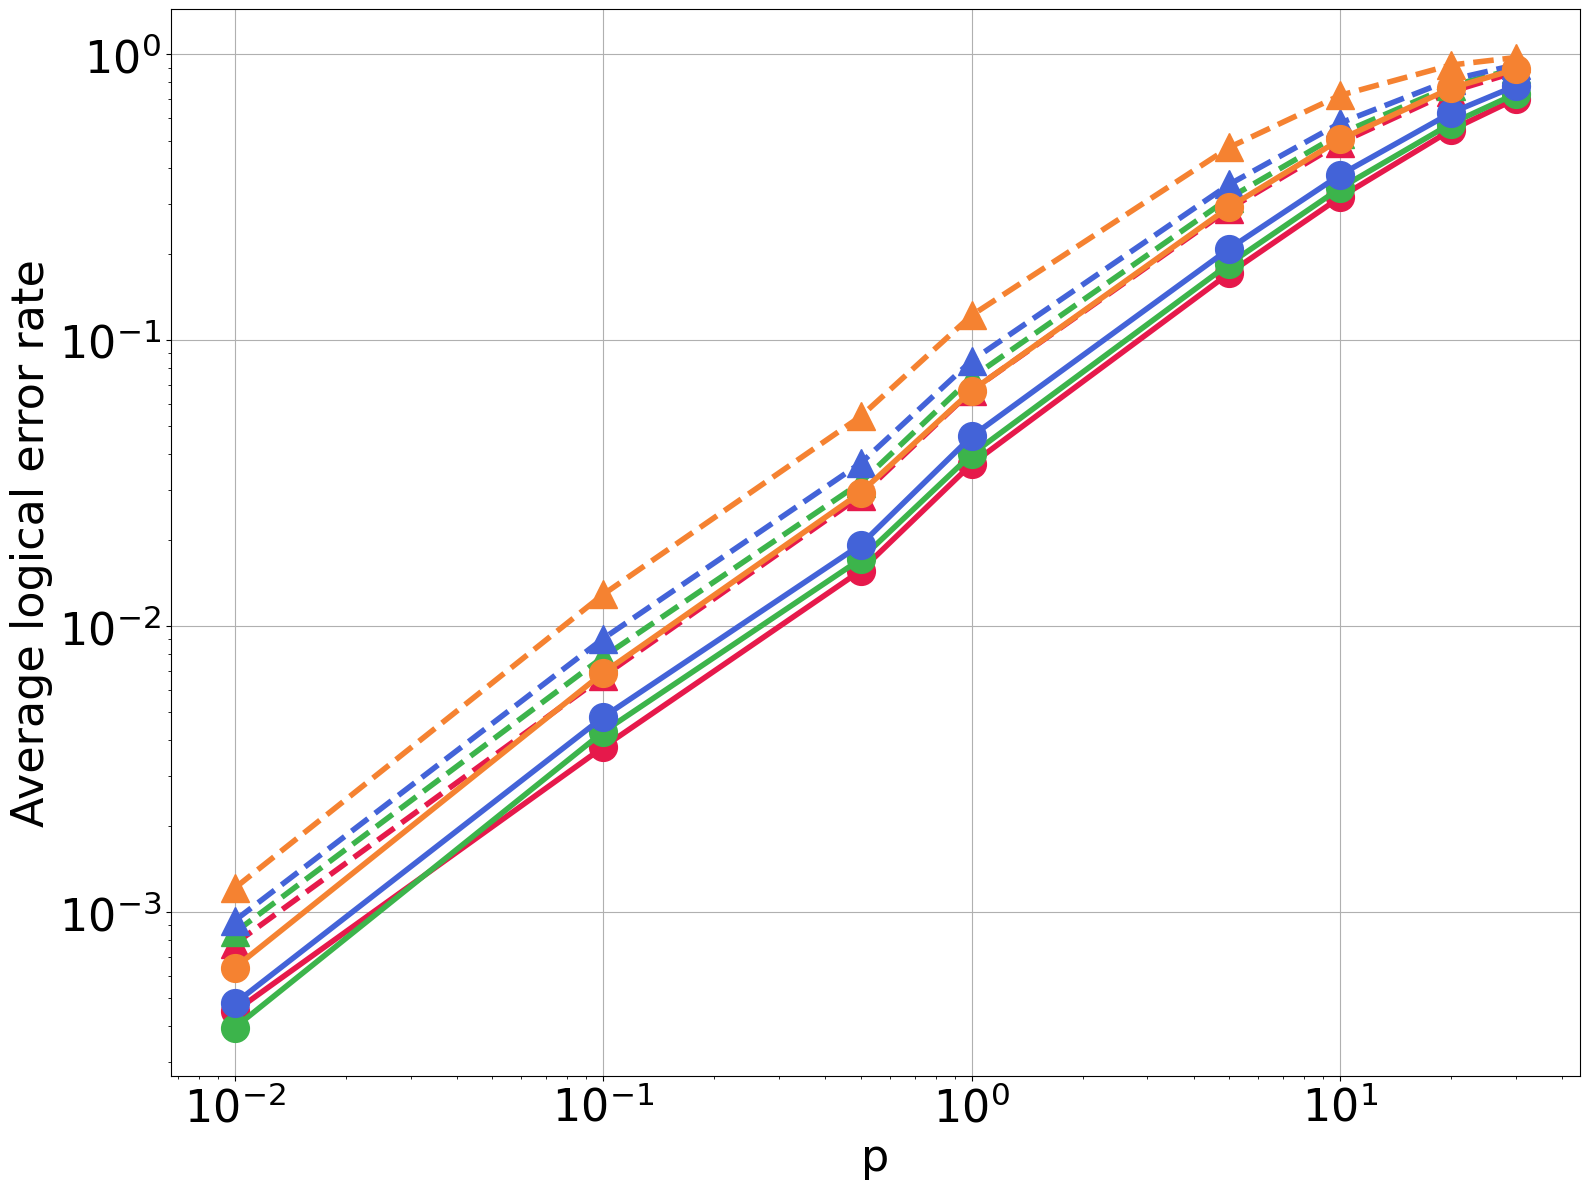

In [8]:
import numpy as np

import matplotlib.pyplot as plt

# 创建画布
plt.figure(figsize=(16, 12))

colors = {
    "[72, 12, 6]": '#E6194B',  # 红
    "[90, 8, 10]": '#3CB44B',  # 绿
    "[108, 8, 10]": '#4363D8',  # 蓝
    "[144, 12, 12]": '#F58231',  # 橙
}


markers = {
    "EAMLD": 'o',
    "BP+OSD": '^',
}

linestyles = {
    "EAMLD": '-',
    "BP+OSD": '--',
}

# nkd_list = ["[72, 12, 6]", "[90, 8, 10]", "[108, 8, 10]", "[144, 12, 12]"]
# nkd_list = ["[72, 12, 6]", "[90, 8, 10]", "[108, 8, 10]"]
nkd_list = [[72, 12, 6], [90, 8, 10], [108, 8, 10], [144, 12, 12]]
# nkd_list = [[72, 12, 6], [90, 8, 10], [108, 8, 10]]
# d_list = [3,5,7 ]
decoder_list = ["EAMLD", "BP+OSD"]

# 遍历不同的码距和解码方法
for nkd in nkd_list:
    nkd = str(nkd)
    for decoder_method in decoder_list:
        # 筛选数据
        subset = df_mean[(df_mean['nkd'] == nkd) & (df_mean['decoder_method'] == decoder_method)]
        
        # 绘制曲线
        plt.plot(
            # np.log10(subset['probability']), 
            subset['probability'], 
            # np.log10(subset['logical_error_rate']), 
            subset['logical_error_rate'], 
            label = f"nkd={nkd}, {decoder_method}",
            color = colors.get(nkd, '#000000'),  # 默认黑色
            marker = markers.get(decoder_method, 'o'),  # 默认圆形
            linestyle = linestyles.get(decoder_method, '-'),  # 实线
            markersize=20,  # 设置标记大小
            linewidth=4  # 设置线条宽度
            )

# 添加图例、标题和标签
# plt.title("r=1, qLDPC code", fontsize=24)  # 设置标题文字大小
plt.xscale('log')  # 对x轴进行log处理
plt.yscale('log')  # 对y轴进行log处理

plt.xlabel("p", fontsize=32)  # 设置x轴标签文字大小
plt.ylabel("Average logical error rate", fontsize=32)  # 设置y轴标签文字大小

# 设置刻度字体大小
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)

plt.grid(True)
plt.tight_layout()

# 在plt.show()之前添加保存PDF的代码
# plt.savefig("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/noisy_varying_result/r_1_qldpc_noisy_varying.pdf", format='pdf', bbox_inches='tight')
plt.savefig("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/noisy_varying_result/r_1_qldpc_noisy_varying.pdf", format='pdf', bbox_inches='tight')

# 显示图形
plt.show()

/tmp/ipykernel_956945/2446557656.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


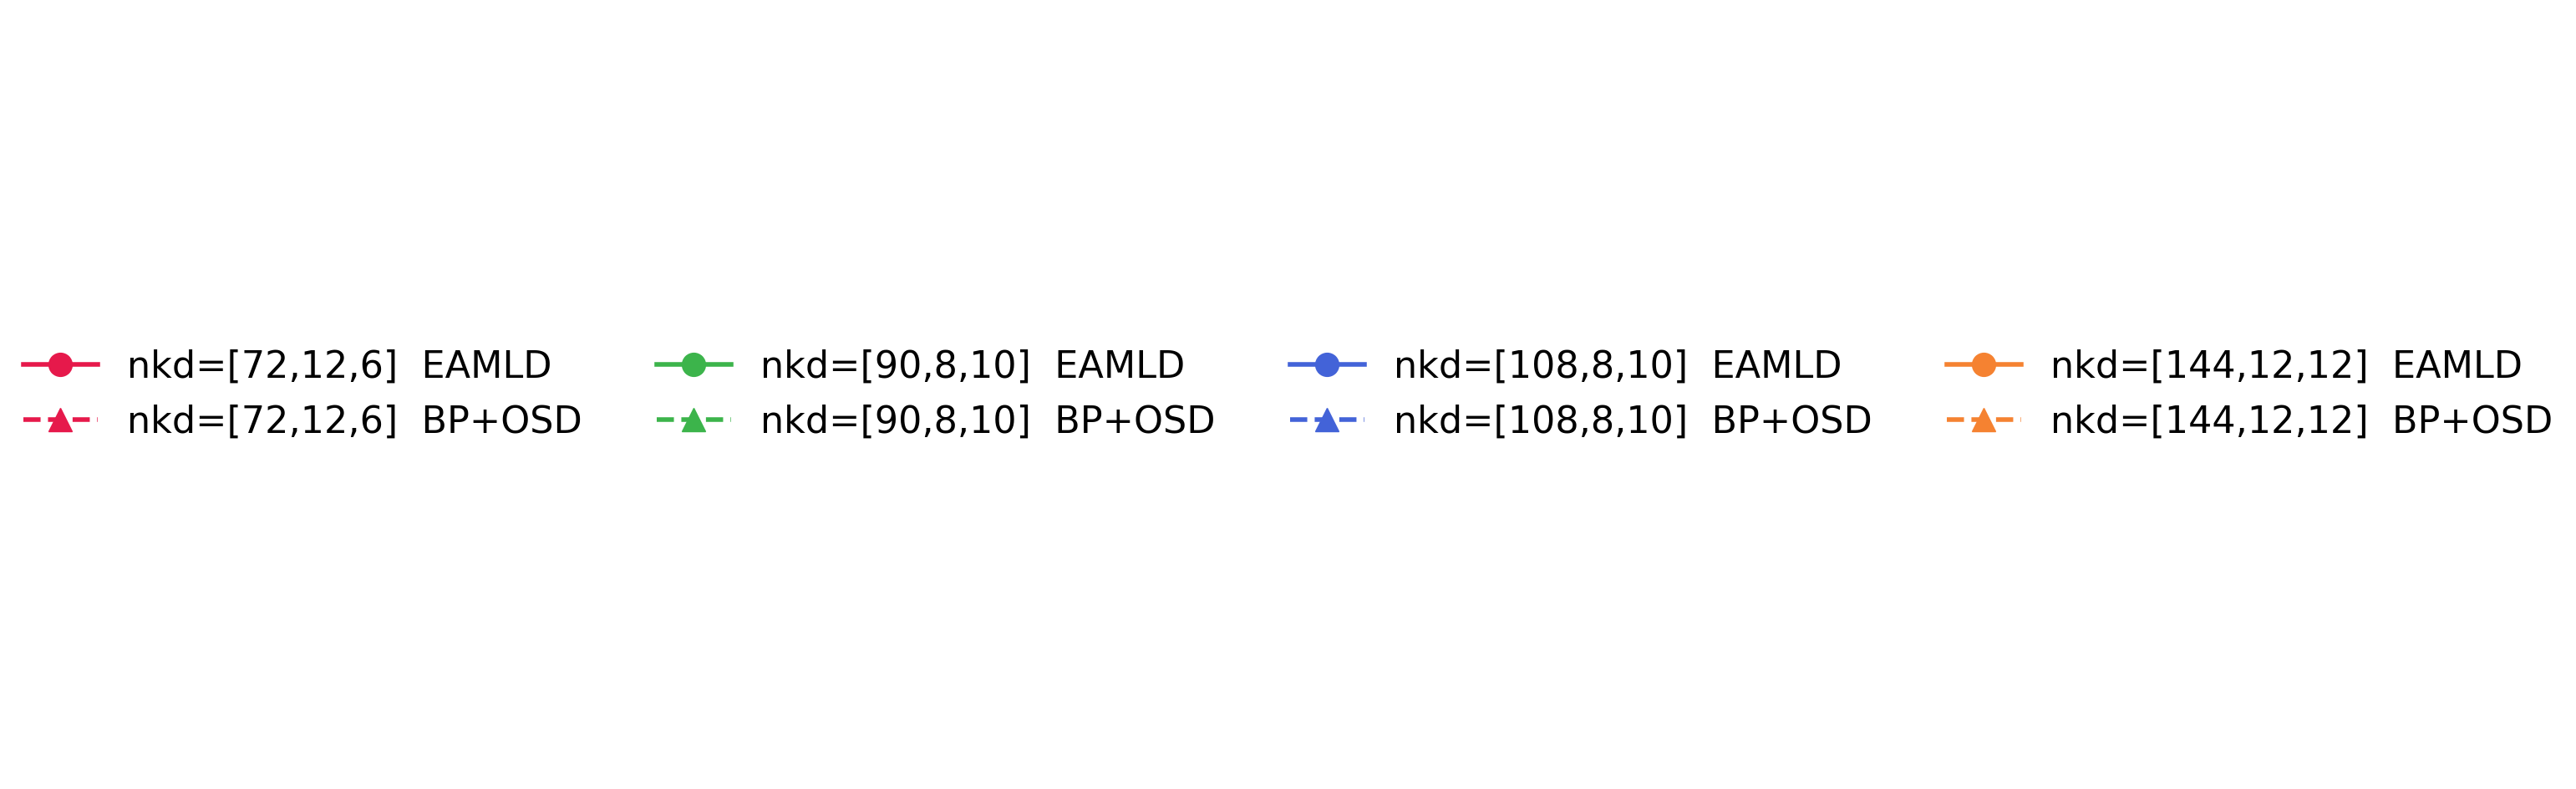

In [9]:
from matplotlib.font_manager import FontProperties

# 创建一个空的图形
fig, ax = plt.subplots(figsize=(16, 12))


# 遍历不同的码距和解码方法，添加图例项
for nkd in nkd_list:
    for decoder_method in decoder_list:
        # label = f"[[{n},1,{d}]], {decoder_method}"
        label = f"nkd=[{nkd[0]},{nkd[1]},{nkd[2]}]  {decoder_method}"
        ax.plot([], [], label=label,
                color=colors.get(str(nkd), '#000000'),  # 默认黑色
                marker=markers.get(decoder_method, 'o'),
                linestyle=linestyles.get(decoder_method, '-'),
                markersize=20,  # 设置标记大小
                linewidth=4  # 设置线条宽度
                )

# 设置字体属性
font = FontProperties()
font.set_size(32)

# 添加图例并设置字体属性
legend = ax.legend(loc='center', ncol=len(nkd_list), frameon=False, prop=font)

# 隐藏坐标轴
ax.axis('off')
plt.tight_layout()

# 在plt.show()之前添加保存PDF的代码
plt.savefig("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/noisy_varying_result/r_1_qldpc_noisy_varying_legend.pdf", format='pdf', bbox_inches='tight')

# 显示图形
plt.show()